# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [15]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [16]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [17]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [18]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'sma' : 200,
    'band' : 3.0
}

Run Strategy

In [19]:
s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [20]:
s.tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
30,1999-10-29,1362.93,2000-10-09,1402.03,39.10,21895.99,560,775372.32,LONG,^GSPC
31,2003-04-22,911.37,2004-08-06,1063.97,152.60,131388.58,861,906760.90,LONG,^GSPC
32,2004-11-04,1161.67,2007-08-15,1406.70,245.03,193328.60,789,1100089.50,LONG,^GSPC
33,2007-09-18,1519.78,2007-11-19,1433.27,-86.51,-63152.31,730,1036937.19,LONG,^GSPC
34,2009-06-11,944.89,2010-05-26,1067.95,123.06,136227.35,1107,1173164.54,LONG,^GSPC
35,2010-10-05,1160.75,2011-08-04,1200.07,39.32,40067.03,1019,1213231.57,LONG,^GSPC
36,2012-01-18,1308.04,2015-08-21,1970.89,662.85,619764.73,935,1832996.29,LONG,^GSPC
37,2016-04-13,2082.42,2018-10-24,2656.10,573.68,507706.96,885,2340703.25,LONG,^GSPC
38,2019-03-21,2854.88,2020-02-28,2954.22,99.34,81756.89,823,2422460.14,LONG,^GSPC
39,2020-06-03,3122.87,2021-04-01,4019.87,897.00,697866.00,778,3120326.14,LONG,^GSPC


In [21]:
s.dbal.tail(10)

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-19,3060500.64,3026758.69,3047259.07,778,2867.19,1.00,-
2021-03-22,3080098.42,3048083.60,3068646.28,778,2867.19,1.00,-
2021-03-23,3075290.24,3038288.70,3045251.77,778,2867.19,1.00,-
2021-03-24,3069805.49,3028563.70,3028618.03,778,2867.19,1.00,-
2021-03-25,3052269.34,3000890.19,3044473.77,778,2867.19,1.00,-
2021-03-26,3097898.97,3050386.64,3095059.34,778,2867.19,1.00,-
2021-03-29,3100730.99,3070715.69,3092375.28,778,2867.19,1.00,-
2021-03-30,3089978.98,3071571.57,3082619.13,778,2867.19,1.00,-
2021-03-31,3110518.10,3089177.62,3093775.53,778,2867.19,1.00,-


Display all available stats

In [22]:
pf.print_full(s.stats)

start                                                   1928-10-16
end                                                     2021-04-01
beginning_balance                                            10000
ending_balance                                          3130326.14
total_net_profit                                        3120326.14
gross_profit                                            3212917.64
gross_loss                                               -92591.50
profit_factor                                                34.70
return_on_initial_capital                                 31203.26
annual_return_rate                                            6.41
trading_period                           92 years 5 months 16 days
pct_time_in_market                                           67.27
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [23]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, s.options['use_adj'])
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

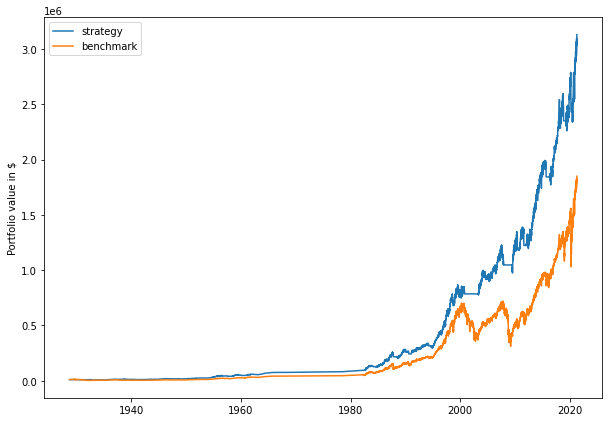

In [24]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

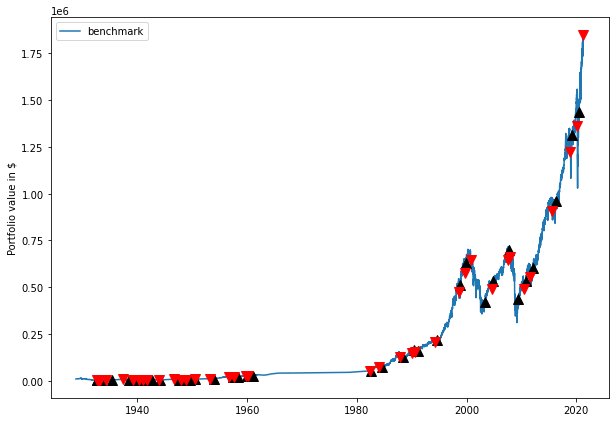

In [25]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

In [26]:
print('trading period:  {} to {}'.format(s.stats['start'], s.stats['end']))
df = pf.summary(s.stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1928-10-16 to 2021-04-01


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$3,130,326.14","$1,849,149.05"
total_net_profit,"$3,120,326.14","$1,839,149.05"
gross_profit,"$3,212,917.64","$1,839,149.05"
gross_loss,"-$92,591.50",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.41,5.81
max_closed_out_drawdown,-52.93,-86.14
annualized_return_over_max_drawdown,0.12,0.07
best_month,74.02,76.71
worst_month,-27.06,-42.17
sharpe_ratio,0.66,0.45
sortino_ratio,0.69,0.57
monthly_std,3.77,5.86
annual_std,17.37,23.28


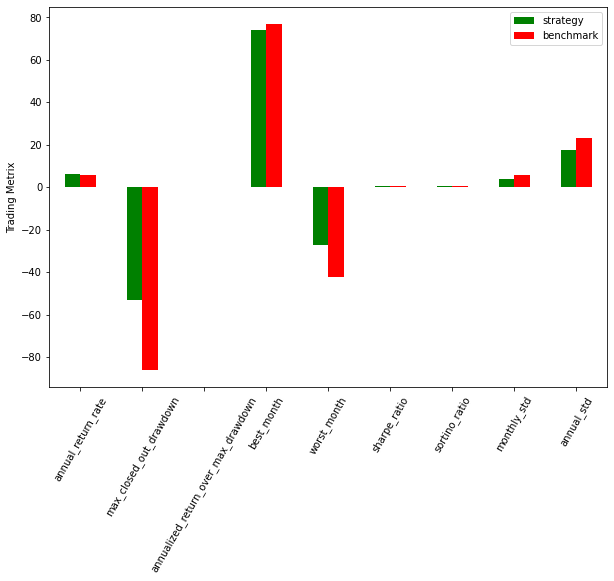

In [27]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Print the raw transaction log

In [28]:
pd.set_option('display.max_rows', len(s.rlog))
s.rlog

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1932-08-10,0,7.65,1307,entry,LONG,^GSPC
1,1932-08-12,1,7.00,1307,exit,LONG,^GSPC
2,1932-08-16,2,7.68,1191,entry,LONG,^GSPC
3,1932-10-10,3,6.42,1191,exit,LONG,^GSPC
4,1932-10-14,4,7.13,1072,entry,LONG,^GSPC
5,1932-11-02,5,6.52,1072,exit,LONG,^GSPC
6,1932-11-07,6,7.24,966,entry,LONG,^GSPC
7,1932-12-02,7,6.47,966,exit,LONG,^GSPC
8,1932-12-07,8,6.89,907,entry,LONG,^GSPC
9,1933-02-14,9,6.32,907,exit,LONG,^GSPC
